# Breast Cancer Data Science Project

Hello, **I'm Ademola Abraham Adeshina**, **a Health Information Data analyst** and I will be working on a real world dataset called **`breast cancer Dataset`** alongside with its **`Metadata`**. The Breast cancer dataset which is in the CSV format was gotten from [data.mendeley.com](https://data.mendeley.com/datasets/63fpbc9cm4/2).

I will be making use of Python data analysis libaries to analyze, clean and transform the Data in preparation for machine learning techinqiue to make a predictive model.

# Data Description

The Dataset consist of 213 patients observation, which was obtained from the University of Calabar Teaching Hospital Cancer registry from january 2019 to August 2020, which is located in Nigeria.
The Data include 11 features, which are;

* Year of diagnosis
* Age of patient
* menopause status
* tumor size(cm)
* number of invasive nodes
* part of breast affected(left or right)
* metastasis
* quadrant of the breast affected
* history of breast disease
* diagnosis result(benign or malignant)

## Importing Python libaries that will be used for data cleaning and machine learning

In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from sklearn import linear_model # importing python library for calculating Regression

# Data Preparation

In [2]:
raw_data = pd.read_csv(r'breast-cancer-dataset.csv') 
raw_data # Loading the dataset into the jupyter notebook(Working space) with pandas for analysis

,S/N,Year,Age,Menopause,Tumor Size (cm),Inv-Nodes,Breast,Metastasis,Breast Quadrant,History,Diagnosis Result
0,1,2019,40,1,2,0,Right,0,Upper inner,0,Benign
1,2,2019,39,1,2,0,Left,0,Upper outer,0,Benign
2,3,2019,45,0,4,0,Left,0,Lower outer,0,Benign
3,4,2019,26,1,3,0,Left,0,Lower inner,1,Benign
4,5,2019,21,1,1,0,Right,0,Upper outer,1,Benign
...,...,...,...,...,...,...,...,...,...,...,...
208,209,2020,49,1,6,3,Right,1,Lower inner,1,Malignant
209,210,2020,28,1,3,0,Left,0,Upper inner,0,Benign
210,211,2020,22,1,1,0,Left,0,Upper outer,1,Benign
211,212,2020,19,1,1,0,Left,0,Lower inner,1,Benign


In [3]:
data = raw_data.copy() # Making a copy of the original loaded dataset
data

,S/N,Year,Age,Menopause,Tumor Size (cm),Inv-Nodes,Breast,Metastasis,Breast Quadrant,History,Diagnosis Result
0,1,2019,40,1,2,0,Right,0,Upper inner,0,Benign
1,2,2019,39,1,2,0,Left,0,Upper outer,0,Benign
2,3,2019,45,0,4,0,Left,0,Lower outer,0,Benign
3,4,2019,26,1,3,0,Left,0,Lower inner,1,Benign
4,5,2019,21,1,1,0,Right,0,Upper outer,1,Benign
...,...,...,...,...,...,...,...,...,...,...,...
208,209,2020,49,1,6,3,Right,1,Lower inner,1,Malignant
209,210,2020,28,1,3,0,Left,0,Upper inner,0,Benign
210,211,2020,22,1,1,0,Left,0,Upper outer,1,Benign
211,212,2020,19,1,1,0,Left,0,Lower inner,1,Benign


In [4]:
metadata = pd.read_csv(r'breast-cancer-metadata.csv',index_col='Column Header')['Column Description']
metadata # Loading the Metadata into the jupyter notebook(Working space) with pandas

Column Header
S/N                            Unique identification for each patient
Year                                 The year diagnosis was conducted
Age                            Age of patient at the time of diagnose
Menopause           Whether the patient is pro or postmenopausal a...
Tumor size                The size in centimeter of the excised tumor
Involved nodes      The number of axillary lymph nodes that contai...
Breast                         If it occurs on the left or right side
Metastatic          If the cancer has spread to other part of the ...
Breast quadrant     The gland is divided into 4 sections with nipp...
History             If the patient has any history or family histo...
Diagnosis result               Instances of the breast cancer dataset
Name: Column Description, dtype: object

In [5]:
metadata['History']

'If the patient has any history or family history on cancer'

with this, we are now done loading our dataset and metadata, we can now proceed to the next step of preprocessing and cleaning of the data for analysis.

# Data cleaning

In [6]:
data.duplicated().sum() # Checking for duplicated rows(repeated datas)

0

In [7]:
data.isnull().sum() # checking for null values

S/N                 0
Year                0
Age                 0
Menopause           0
Tumor Size (cm)     0
Inv-Nodes           0
Breast              0
Metastasis          0
Breast Quadrant     0
History             0
Diagnosis Result    0
dtype: int64

In [8]:
data.columns # checking the columns in the dataset

Index(['S/N', 'Year', 'Age', 'Menopause', 'Tumor Size (cm)', 'Inv-Nodes',
       'Breast', 'Metastasis', 'Breast Quadrant', 'History',
       'Diagnosis Result'],
      dtype='object')

In [9]:
data.shape # checking for the number of rows and columns of the whole data

(213, 11)

In [10]:
data.info() # Checking the summarized form of the data in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   S/N               213 non-null    int64 
 1   Year              213 non-null    object
 2   Age               213 non-null    int64 
 3   Menopause         213 non-null    int64 
 4   Tumor Size (cm)   213 non-null    object
 5   Inv-Nodes         213 non-null    object
 6   Breast            213 non-null    object
 7   Metastasis        213 non-null    object
 8   Breast Quadrant   213 non-null    object
 9   History           213 non-null    object
 10  Diagnosis Result  213 non-null    object
dtypes: int64(3), object(8)
memory usage: 18.4+ KB


In [11]:
data.nunique() # Checking the number of unique values in each columns

S/N                 213
Year                  3
Age                  58
Menopause             2
Tumor Size (cm)      13
Inv-Nodes             4
Breast                3
Metastasis            3
Breast Quadrant       6
History               3
Diagnosis Result      2
dtype: int64

In [12]:
data['Year'].unique() # Unique values in the Year columns

array(['2019', '#', '2020'], dtype=object)

In [13]:
data.where((data['Year'] != '#'), np.nan, inplace=True) # replacing the # value with a null value in the Year column

In [14]:
data['Year'].unique()

array(['2019', nan, '2020'], dtype=object)

In [15]:
data.Age.unique() # Unique values in the Age column

array([40., 39., 45., 26., 21., 50., 58., 35., 42., 41., 43., 30., 33.,
       38., 60., 47., 57., 34., 31., 36., 56., 48., 61., 20., nan, 37.,
       27., 25., 17., 23., 59., 67., 46., 24., 49., 53., 28., 68., 64.,
       18., 14., 15., 54., 71., 55., 22., 65., 19., 52., 51., 44., 63.,
       29., 32., 62., 69., 13., 16., 77.])

In [16]:
data.Menopause.unique() # Unique values in the Menopause column

array([ 1.,  0., nan])

In [17]:
data['Tumor Size (cm)'].unique() # Unique values in the Tumor size column

array(['2', '4', '3', '1', '5', '6', '7', '10', '8', '9', nan, '14', '12'],
      dtype=object)

In [18]:
data['Inv-Nodes'].unique() # Unique values in the Involved nodes columns

array(['0', '1', nan, '3'], dtype=object)

In [19]:
data['Breast'].unique() # Unique values in the Breast column

array(['Right', 'Left', nan, '#'], dtype=object)

In [20]:
data.where((data['Breast'] != '#'), np.nan, inplace=True) # replacing the # values with a null value in the Breast column

In [21]:
data['Breast'].unique()

array(['Right', 'Left', nan], dtype=object)

In [22]:
data['Metastasis'].unique() # Unique values in the Metastasis column

array(['0', '1', nan], dtype=object)

In [23]:
data['Breast Quadrant'].unique() # Unique values in the Breast Quadrant column

array(['Upper inner', 'Upper outer', 'Lower outer', 'Lower inner', '#',
       nan, 'Upper outer '], dtype=object)

In [24]:
data.where((data['Breast Quadrant'] != '#'), np.nan, inplace=True) # replacing #values with null values in the column
data['Breast Quadrant'] = data['Breast Quadrant'].str.strip()

In [25]:
data['Breast Quadrant'].unique()

array(['Upper inner', 'Upper outer', 'Lower outer', 'Lower inner', nan],
      dtype=object)

In [26]:
data['History'].unique() # Unique values in the History column

array(['0', '1', nan, '#'], dtype=object)

In [27]:
data.where(~(data.History == '#'), np.nan, inplace=True) # replacing #values with null values

In [28]:
data['History'].unique()

array(['0', '1', nan], dtype=object)

In [29]:
data['Diagnosis Result'].unique()

array(['Benign', 'Malignant', nan], dtype=object)

In [30]:
data.isnull().sum() # Checking the number of null values in each columns of the dataset

S/N                 8
Year                8
Age                 8
Menopause           8
Tumor Size (cm)     8
Inv-Nodes           8
Breast              8
Metastasis          8
Breast Quadrant     8
History             8
Diagnosis Result    8
dtype: int64

In [31]:
data.dropna(inplace=True) # removing the null values from the dataset
data

,S/N,Year,Age,Menopause,Tumor Size (cm),Inv-Nodes,Breast,Metastasis,Breast Quadrant,History,Diagnosis Result
0,1.0,2019,40.0,1.0,2,0,Right,0,Upper inner,0,Benign
1,2.0,2019,39.0,1.0,2,0,Left,0,Upper outer,0,Benign
2,3.0,2019,45.0,0.0,4,0,Left,0,Lower outer,0,Benign
3,4.0,2019,26.0,1.0,3,0,Left,0,Lower inner,1,Benign
4,5.0,2019,21.0,1.0,1,0,Right,0,Upper outer,1,Benign
...,...,...,...,...,...,...,...,...,...,...,...
208,209.0,2020,49.0,1.0,6,3,Right,1,Lower inner,1,Malignant
209,210.0,2020,28.0,1.0,3,0,Left,0,Upper inner,0,Benign
210,211.0,2020,22.0,1.0,1,0,Left,0,Upper outer,1,Benign
211,212.0,2020,19.0,1.0,1,0,Left,0,Lower inner,1,Benign


In [32]:
data.reset_index(drop=True, inplace=True) # resetting the index of the dataset in an orderly manner
data

,S/N,Year,Age,Menopause,Tumor Size (cm),Inv-Nodes,Breast,Metastasis,Breast Quadrant,History,Diagnosis Result
0,1.0,2019,40.0,1.0,2,0,Right,0,Upper inner,0,Benign
1,2.0,2019,39.0,1.0,2,0,Left,0,Upper outer,0,Benign
2,3.0,2019,45.0,0.0,4,0,Left,0,Lower outer,0,Benign
3,4.0,2019,26.0,1.0,3,0,Left,0,Lower inner,1,Benign
4,5.0,2019,21.0,1.0,1,0,Right,0,Upper outer,1,Benign
...,...,...,...,...,...,...,...,...,...,...,...
200,209.0,2020,49.0,1.0,6,3,Right,1,Lower inner,1,Malignant
201,210.0,2020,28.0,1.0,3,0,Left,0,Upper inner,0,Benign
202,211.0,2020,22.0,1.0,1,0,Left,0,Upper outer,1,Benign
203,212.0,2020,19.0,1.0,1,0,Left,0,Lower inner,1,Benign


In [33]:
data.dtypes # checking the datatypes of each column

S/N                 float64
Year                 object
Age                 float64
Menopause           float64
Tumor Size (cm)      object
Inv-Nodes            object
Breast               object
Metastasis           object
Breast Quadrant      object
History              object
Diagnosis Result     object
dtype: object

In [34]:
# changing the data type of each columns to the appropriate data types

data['Diagnosis Result'] = data['Diagnosis Result'].astype('category')
data['Tumor Size (cm)'] = pd.to_numeric(data['Tumor Size (cm)'])
data['Age'] = pd.to_numeric(data['Age']).astype('int32')
data['S/N'] = pd.to_numeric(data['S/N']).astype('int32')
data['Menopause'] = data['Menopause'].astype('int32')
data['Inv-Nodes'] = pd.to_numeric(data['Inv-Nodes'])
data['Breast'] = data['Breast'].astype('string')
data['Breast Quadrant'] = data['Breast Quadrant'].astype('string')
data['History'] = pd.to_numeric(data['History']).astype('bool')
data['Year'] = pd.to_numeric(data['Year']).astype('int32')
data['Metastasis'] = data['Metastasis'].astype('int32').astype('bool')

In [35]:
data.dtypes # checking the new datatypes of each column

S/N                    int32
Year                   int32
Age                    int32
Menopause              int32
Tumor Size (cm)        int64
Inv-Nodes              int64
Breast                string
Metastasis              bool
Breast Quadrant       string
History                 bool
Diagnosis Result    category
dtype: object

In [36]:
for n,num in zip(data.index,data['Menopause']):
    if num == 0:
        data['Menopause'].loc[n] = 'Post Menopause'
    else:
        data['Menopause'].loc[n] = 'Pre Menopause'
    # changing the data of the Menopause column(1 or 0) to a more detailed data(Post menopause or Pre menopause)
data['Menopause'] = data['Menopause'].astype('string')

C:\Users\MR ADEMOLA\AppData\Local\Temp\ipykernel_30160\766033030.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Menopause'].loc[n] = 'Pre Menopause'


In [37]:
data.info() # checking the summarized form of the datas in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   S/N               205 non-null    int32   
 1   Year              205 non-null    int32   
 2   Age               205 non-null    int32   
 3   Menopause         205 non-null    string  
 4   Tumor Size (cm)   205 non-null    int64   
 5   Inv-Nodes         205 non-null    int64   
 6   Breast            205 non-null    string  
 7   Metastasis        205 non-null    bool    
 8   Breast Quadrant   205 non-null    string  
 9   History           205 non-null    bool    
 10  Diagnosis Result  205 non-null    category
dtypes: bool(2), category(1), int32(3), int64(2), string(3)
memory usage: 11.3 KB


In [38]:
data.describe() # Statistical summary of the dataset

,S/N,Year,Age,Tumor Size (cm),Inv-Nodes
count,205.000000,205.000000,205.000000,205.000000,205.000000
mean,107.063415,2019.521951,39.712195,4.287805,0.356098
std,61.700978,0.500741,14.161883,2.572497,0.509733
min,1.000000,2019.000000,13.000000,1.000000,0.000000
25%,55.000000,2019.000000,30.000000,2.000000,0.000000
50%,107.000000,2020.000000,40.000000,4.000000,0.000000
75%,159.000000,2020.000000,49.000000,6.000000,1.000000
max,213.000000,2020.000000,77.000000,14.000000,3.000000


In [39]:
list1 = list()
for age in data['Age']:
    if age <= 20:
        list1.append('less than 20')    # Creating a new column for the Age group   
    elif age <= 25:
        list1.append('20 to 25')
    elif age <=30:
        list1.append('26 to 30')
    elif age <=35:
        list1.append('31 to 35')
    elif age <=40:
        list1.append('36 to 40')
    elif age <=45:
        list1.append('41 to 45')
    elif age <=50:
        list1.append('46 to 50')
    elif age <=55:
        list1.append('51 to 55')
    elif age <=60:
        list1.append('56 to 60')
    elif age <=65:
        list1.append('61 to 65')
    elif age <=70:
        list1.append('66 to 70')
    else:
        list1.append('older than 70')

data['Age group'] = list1
data.head(5)

,S/N,Year,Age,Menopause,Tumor Size (cm),Inv-Nodes,Breast,Metastasis,Breast Quadrant,History,Diagnosis Result,Age group
0,1,2019,40,Pre Menopause,2,0,Right,False,Upper inner,False,Benign,36 to 40
1,2,2019,39,Pre Menopause,2,0,Left,False,Upper outer,False,Benign,36 to 40
2,3,2019,45,Post Menopause,4,0,Left,False,Lower outer,False,Benign,41 to 45
3,4,2019,26,Pre Menopause,3,0,Left,False,Lower inner,True,Benign,26 to 30
4,5,2019,21,Pre Menopause,1,0,Right,False,Upper outer,True,Benign,20 to 25


In [63]:
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (14,7)
sns.set_style('darkgrid')

This marks the end of Data Cleaning and Transformation


# Predictive Modeling of Breast Cancer Diagnosis Using Machine Learning: A Focus on Tumor size and Patient age

Breast cancer is one of the most prevalent cancers affecting women worldwide. Early and accurate diagnosis is crucial for effective treatment and improving patient outcomes. In this project, we harness the power of machine learning to predict the diagnosis of breast cancer, specifically determining whether a tumor is malignant or benign based on multiple variables.

Using a dataset that includes tumor size and patient age, we develop a classification model to make these predictions. Machine learning algorithms have shown great promise in the field of medical diagnostics, providing tools that can assist healthcare professionals in making faster and more accurate decisions.

The dataset employed in this project consists of detailed records of breast cancer cases, including key variables that are significant for diagnosis. By applying various machine learning techniques, we aim to build a robust model that can reliably classify tumors and support the early detection of breast cancer.

This project highlights the potential of machine learning in enhancing cancer diagnosis and demonstrates how data-driven approaches can contribute to better healthcare solutions.



## Logistic regression

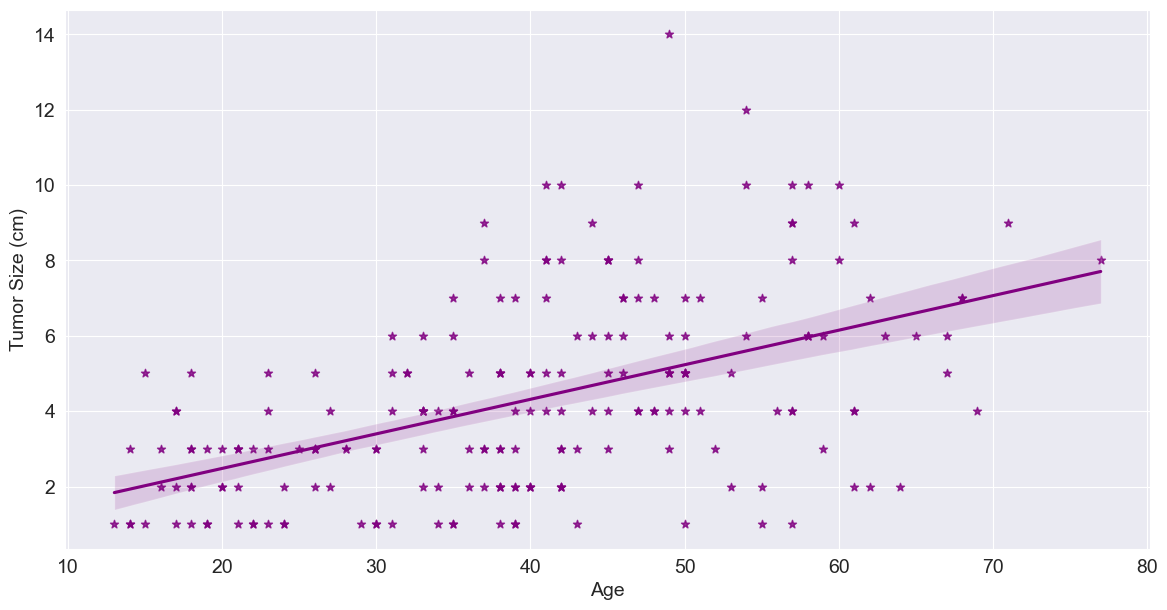

In [75]:
sns.regplot(data=data, x='Age', y='Tumor Size (cm)', color='purple', marker='*');

In [80]:
data.corr(numeric_only=True)

,S/N,Year,Age,Tumor Size (cm),Inv-Nodes,Metastasis,History
S/N,1.000000,0.861077,0.015891,0.024220,0.030762,-0.018573,0.114366
Year,0.861077,1.000000,0.000550,0.118747,0.074853,0.019323,0.161957
Age,0.015891,0.000550,1.000000,0.504572,0.495718,0.475651,0.180567
Tumor Size (cm),0.024220,0.118747,0.504572,1.000000,0.728929,0.701399,0.200313
Inv-Nodes,0.030762,0.074853,0.495718,0.728929,1.000000,0.881431,0.216288
Metastasis,-0.018573,0.019323,0.475651,0.701399,0.881431,1.000000,0.164842
History,0.114366,0.161957,0.180567,0.200313,0.216288,0.164842,1.000000


In [40]:
x = np.array(data[['Tumor Size (cm)']]) # independent variable
y = np.array(data[['Diagnosis Result']])[:, 0] # dependent variable

In [41]:
logr = linear_model.LogisticRegression() 
logr.fit(x,y) # logistic regression model

LogisticRegression()

In [42]:
predicted=logr.predict(np.array([4]).reshape(-1, 1)) # model Prediction
print(predicted)

['Benign']


In [43]:
data[data['Tumor Size (cm)'] == 4]['Diagnosis Result'].value_counts() # Number of datas with the input tumor size variable

Benign       26
Malignant     5
Name: Diagnosis Result, dtype: int64

In [44]:
a = data[data['Tumor Size (cm)'] == 4]['Diagnosis Result'].value_counts() # Probability
chances = int((max(a)/sum(a))*100)
print('{}% chances of been {}'.format(chances,str(predicted)[2:].replace("'","").replace("]","")))

83% chances of been Benign


In [45]:
logr.score(x,y) # logistic regression model evaluation

0.8829268292682927

has a good relationship!

In [46]:
log_odds = logr.coef_
odds = np.exp(log_odds)  # Coefficient

print(odds)

[[2.89130113]]


In [47]:
def prediction_function():
    a = int(input('Tumor Size: '))
    predicted=logr.predict(np.array([a]).reshape(-1, 1))
    print('Prediction: {} diagnosis'.format(str(predicted)[2:].replace("']","")))
    
    b = data[data['Tumor Size (cm)'] == a]['Diagnosis Result'].value_counts()
    chances = int((max(b)/sum(b))*100)
    print('There is {}% chance of the daignosis been {}'.format(chances,str(predicted)[2:].replace("']","")))

In [49]:
prediction_function()

Tumor Size: 4
Prediction: Benign diagnosis
There is 83% chance of the daignosis been Benign


### Prediction 1

In [ ]:
prediction_function()

### Prediction 2

In [ ]:
prediction_function()

### Prediction 3

In [ ]:
prediction_function()

## Multiple logistic regression

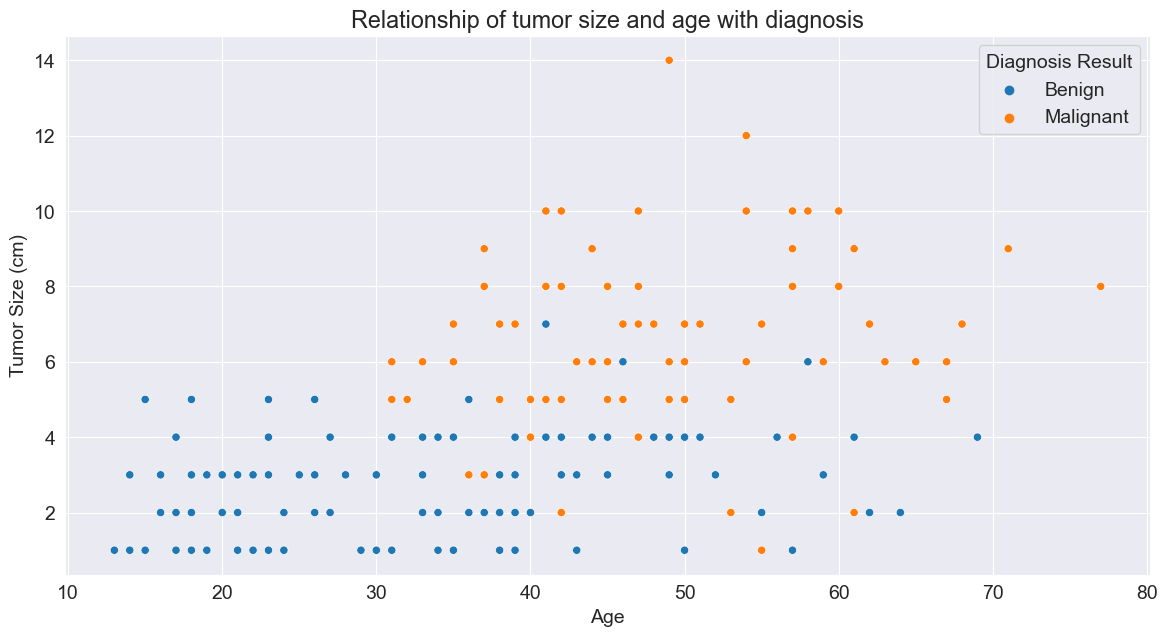

In [82]:
sns.scatterplot(data=data, y='Tumor Size (cm)', x='Age', hue='Diagnosis Result')
matplotlib.pyplot.title('Relationship of tumor size and age with diagnosis');

In [ ]:
model = linear_model.LogisticRegression(multi_class='multinomial', solver='lbfgs') # building regression model

In [ ]:
x = np.array(data[['Tumor Size (cm)', 'Age']]) # independent variable
y = np.array(data[['Diagnosis Result']])[:, 0] # dependent variable

In [ ]:
model.fit(x,y) # multinomial logistic regression model

In [ ]:
prediction = model.predict(np.array([5, 60]).reshape(1, -1)) # multinomial logistic regression model prediction
prediction

In [ ]:
model.score(x,y) # multiple logistic regression model evaluation

has a good relationship!

In [ ]:
def multiple_prediction_function():
    c = int(input('Tumor Size (cm): '))
    d = int(input('Age: '))
    prediction = model.predict(np.array([c, d]).reshape(1, -1))
    print('Diagnosis will likely be {}'.format(str(prediction)[2:].replace("']", "")))

In [ ]:
multiple_prediction_function()

### Prediction 1

In [ ]:
multiple_prediction_function()

### Prediction 2

In [ ]:
multiple_prediction_function()

### Prediction 3

In [ ]:
multiple_prediction_function()

**This marks the end of Machine learning on Breast cancer dataset.**